In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score


In [3]:
json_url = 'http://127.0.0.1:5000/healthstatistics_data'

In [4]:
health_df = pd.read_json(json_url)
health_df.head()

,Age_Group,Availability_of_Vaccines_Treatment,Avg_Treatment_Cost_USD,Country,DALYs,Disease_Category,Disease_Name,Doctors_Per_1000,Education_Index,Gender,...,Improvement_in_5_Years,Incidence_Rate,Mortality_Rate,Per_Capita_Income_USD,Population_Affected,Prevalence_Rate,Recovery_Rate,Treatment_Type,Urbanization_Rate,Year
0,0-18,No,21064,Italy,4493,Respiratory,Malaria,3.34,0.79,Male,...,2.16,1.55,8.42,16886,471007,0.95,91.82,Medication,86.02,2013
1,61+,Yes,47851,France,2366,Parasitic,Ebola,1.33,0.74,Male,...,4.82,8.63,8.75,80639,634318,12.46,76.65,Surgery,45.52,2002
2,36-60,Yes,27834,Turkey,41,Genetic,COVID-19,4.07,0.41,Male,...,5.81,2.35,6.22,12245,154878,0.91,98.55,Vaccination,40.20,2015
3,0-18,Yes,144,Indonesia,3201,Autoimmune,Parkinson's Disease,3.18,0.49,Other,...,2.22,6.29,3.99,49336,446224,4.68,67.35,Surgery,58.47,2011
4,61+,Yes,8908,Italy,2832,Genetic,Tuberculosis,4.61,0.50,Male,...,6.93,13.59,7.01,47701,472908,0.83,50.06,Medication,48.14,2013


In [49]:
health_df['recovery_rate'] = health_df['recovery_rate'].round()
health_df

,country,year,disease_name,disease_category,prevalence_rate,incidence_rate,mortality_rate,age_group,gender,population_affected,...,hospital_beds_per_1000,treatment_type,average_treatment_cost_usd,availability_of_vaccines_treatment,recovery_rate,dalys,improvement_in_5_years,per_capita_income_usd,education_index,urbanization_rate
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,...,7.58,Medication,21064,No,92.0,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,77.0,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,...,3.49,Vaccination,27834,Yes,99.0,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,...,8.44,Surgery,144,Yes,67.0,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,...,5.90,Medication,8908,Yes,50.0,2832,6.93,47701,0.50,48.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Saudi Arabia,2021,Parkinson's Disease,Infectious,4.56,4.83,9.65,0-18,Female,119332,...,4.23,Vaccination,4528,Yes,92.0,1024,3.88,29335,0.75,27.94
999996,Saudi Arabia,2013,Malaria,Respiratory,0.26,1.76,0.56,0-18,Female,354927,...,6.34,Surgery,20686,No,84.0,202,7.95,30752,0.47,77.66
999997,USA,2016,Zika,Respiratory,13.44,14.13,1.91,19-35,Other,807915,...,8.11,Therapy,18807,No,87.0,3338,7.31,62897,0.72,46.90
999998,Nigeria,2020,Asthma,Chronic,1.96,14.56,4.98,61+,Female,385896,...,6.91,Medication,21033,Yes,62.0,4806,3.82,98189,0.51,34.73


In [50]:
health_df.describe()

,year,prevalence_rate,incidence_rate,mortality_rate,population_affected,healthcare_access,doctors_per_1000,hospital_beds_per_1000,average_treatment_cost_usd,recovery_rate,dalys,improvement_in_5_years,per_capita_income_usd,education_index,urbanization_rate
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2011.996999,10.047992,7.555005,5.049919,500735.427363,74.987835,2.747929,5.245931,25010.313665,74.497563,2499.144809,5.002593,50311.099835,0.650069,54.985212
std,7.217287,5.740189,4.298947,2.859427,288660.116648,14.436345,1.299067,2.742865,14402.279227,14.160839,1443.923798,2.888298,28726.959359,0.144472,20.214042
min,2000.000000,0.100000,0.100000,0.100000,1000.000000,50.000000,0.500000,0.500000,100.000000,50.000000,1.000000,0.000000,500.000000,0.400000,20.000000
25%,2006.000000,5.090000,3.840000,2.580000,250491.250000,62.470000,1.620000,2.870000,12538.000000,62.000000,1245.000000,2.500000,25457.000000,0.530000,37.470000
50%,2012.000000,10.040000,7.550000,5.050000,501041.000000,75.000000,2.750000,5.240000,24980.000000,74.000000,2499.000000,5.000000,50372.000000,0.650000,54.980000
75%,2018.000000,15.010000,11.280000,7.530000,750782.000000,87.490000,3.870000,7.620000,37493.000000,87.000000,3750.000000,7.510000,75195.000000,0.780000,72.510000
max,2024.000000,20.000000,15.000000,10.000000,1000000.000000,100.000000,5.000000,10.000000,50000.000000,99.000000,5000.000000,10.000000,100000.000000,0.900000,90.000000


In [51]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   country                             1000000 non-null  object 
 1   year                                1000000 non-null  int64  
 2   disease_name                        1000000 non-null  object 
 3   disease_category                    1000000 non-null  object 
 4   prevalence_rate                     1000000 non-null  float64
 5   incidence_rate                      1000000 non-null  float64
 6   mortality_rate                      1000000 non-null  float64
 7   age_group                           1000000 non-null  object 
 8   gender                              1000000 non-null  object 
 9   population_affected                 1000000 non-null  int64  
 10  healthcare_access                   1000000 non-null  float64
 11  doctors_per_

In [52]:
health_df.columns

Index(['country', 'year', 'disease_name', 'disease_category',
       'prevalence_rate', 'incidence_rate', 'mortality_rate', 'age_group',
       'gender', 'population_affected', 'healthcare_access',
       'doctors_per_1000', 'hospital_beds_per_1000', 'treatment_type',
       'average_treatment_cost_usd', 'availability_of_vaccines_treatment',
       'recovery_rate', 'dalys', 'improvement_in_5_years',
       'per_capita_income_usd', 'education_index', 'urbanization_rate'],
      dtype='object')

In [53]:
health_df.nunique()

country                                   20
year                                      25
disease_name                              20
disease_category                          11
prevalence_rate                         1991
incidence_rate                          1491
mortality_rate                           991
age_group                                  4
gender                                     3
population_affected                   632061
healthcare_access                       5001
doctors_per_1000                         451
hospital_beds_per_1000                   951
treatment_type                             4
average_treatment_cost_usd             49901
availability_of_vaccines_treatment         2
recovery_rate                             50
dalys                                   5000
improvement_in_5_years                  1001
per_capita_income_usd                  99498
education_index                           51
urbanization_rate                       7001
dtype: int

In [54]:
health_df.isnull().sum()

country                               0
year                                  0
disease_name                          0
disease_category                      0
prevalence_rate                       0
incidence_rate                        0
mortality_rate                        0
age_group                             0
gender                                0
population_affected                   0
healthcare_access                     0
doctors_per_1000                      0
hospital_beds_per_1000                0
treatment_type                        0
average_treatment_cost_usd            0
availability_of_vaccines_treatment    0
recovery_rate                         0
dalys                                 0
improvement_in_5_years                0
per_capita_income_usd                 0
education_index                       0
urbanization_rate                     0
dtype: int64

In [55]:
print(health_df['disease_name'].nunique())
print(health_df['disease_name'].unique())
print(health_df['country'].unique())

20
['Malaria' 'Ebola' 'COVID-19' "Parkinson's Disease" 'Tuberculosis'
 'Dengue' 'Rabies' 'Cholera' 'Leprosy' 'Cancer' 'Diabetes' 'Measles'
 'Zika' "Alzheimer's Disease" 'Polio' 'Hypertension' 'Asthma' 'HIV/AIDS'
 'Influenza' 'Hepatitis']
['Italy' 'France' 'Turkey' 'Indonesia' 'Saudi Arabia' 'USA' 'Nigeria'
 'Australia' 'Canada' 'Mexico' 'China' 'South Africa' 'Japan' 'UK'
 'Russia' 'Brazil' 'Germany' 'India' 'Argentina' 'South Korea']


In [56]:
health_df.duplicated().sum()

0

In [57]:
print(health_df[['country','year']].value_counts())

country       year
China         2023    2178
Russia        2000    2137
South Korea   2016    2116
UK            2002    2116
South Africa  2023    2114
                      ... 
Nigeria       2012    1898
              2008    1896
Japan         2016    1890
USA           2014    1886
Turkey        2003    1880
Name: count, Length: 500, dtype: int64


In [69]:
X = health_df.drop(columns = ['recovery_rate','mortality_rate','year'])
y = health_df['mortality_rate']

In [70]:
X = pd.get_dummies(X, drop_first=True,dtype='int')

In [71]:
X.head()

,prevalence_rate,incidence_rate,population_affected,healthcare_access,doctors_per_1000,hospital_beds_per_1000,average_treatment_cost_usd,dalys,improvement_in_5_years,per_capita_income_usd,...,disease_category_Viral,age_group_19-35,age_group_36-60,age_group_61+,gender_Male,gender_Other,treatment_type_Surgery,treatment_type_Therapy,treatment_type_Vaccination,availability_of_vaccines_treatment_Yes
0,0.95,1.55,471007,57.74,3.34,7.58,21064,4493,2.16,16886,...,0,0,0,0,1,0,0,0,0,0
1,12.46,8.63,634318,89.21,1.33,5.11,47851,2366,4.82,80639,...,0,0,0,1,1,0,1,0,0,1
2,0.91,2.35,154878,56.41,4.07,3.49,27834,41,5.81,12245,...,0,0,1,0,1,0,0,0,1,1
3,4.68,6.29,446224,85.20,3.18,8.44,144,3201,2.22,49336,...,0,0,0,0,0,1,1,0,0,1
4,0.83,13.59,472908,67.00,4.61,5.90,8908,2832,6.93,47701,...,0,0,0,1,1,0,0,0,0,1


In [72]:
# Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [73]:
X_train.shape

(750000, 69)

In [74]:
X_test.shape

(250000, 69)

In [75]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [76]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=100, activation="selu", input_dim=69))
nn_model.add(tf.keras.layers.Dense(units=50, activation="elu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="softmax"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="mean_absolute_error", optimizer="Adam", metrics= ['r2_score'])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

c:\Users\mrybi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


c:\Users\mrybi\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


23438/23438 ━━━━━━━━━━━━━━━━━━━━ 20s 778us/step - loss: 4.1355 - r2_score: -2.0079
Epoch 2/50
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 18s 768us/step - loss: 4.1297 - r2_score: -2.0050
Epoch 3/50
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 19s 791us/step - loss: 4.1255 - r2_score: -2.0010
Epoch 4/50
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 19s 792us/step - loss: 4.1333 - r2_score: -2.0090
Epoch 5/50
 6157/23438 ━━━━━━━━━━━━━━━━━━━━ 14s 825us/step - loss: 4.1414 - r2_score: -2.0235

KeyboardInterrupt: 

In [77]:
clean_df = health_df[['country','year','disease_name','disease_category','age_group','gender','treatment_type']]
clean_df = clean_df.drop_duplicates()

In [78]:
clean_list = clean_df.index.to_list()
clean_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [79]:
health_df = health_df.iloc[clean_list]

In [80]:
health_selection_df = health_df.drop(columns=['disease_category','average_treatment_cost_usd',
                                               'incidence_rate','education_index','per_capita_income_usd',
                                               'population_affected','doctors_per_1000',
                                               'hospital_beds_per_1000','dalys','mortality_rate','year'])

In [81]:
cat_columns = health_selection_df.select_dtypes(include=['object']).columns

In [82]:
X = health_selection_df.drop(columns='recovery_rate')
y = health_selection_df['recovery_rate']

In [83]:
X = pd.get_dummies(X, columns=cat_columns,dtype='int')

In [84]:
# Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.2)

In [85]:
model = XGBRegressor(n_estimator = 100, random_state=78, max_depth=5)

In [86]:
model.fit(X_train,y_train)

c:\Users\mrybi\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:07:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimator=100, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [87]:
y_predict = model.predict(X_test)
y_predict= y_predict.round(1)

In [88]:
y_test = y_test.round(1)

In [89]:
print(mean_squared_error(y_test,y_predict)**0.5)

14.153642324089233


In [90]:
r2 = r2_score(y_test,y_predict)
r2

-0.002469686129329629

In [91]:
model.get_booster().get_score(importance_type='weight')

{'prevalence_rate': 549.0,
 'healthcare_access': 480.0,
 'improvement_in_5_years': 466.0,
 'urbanization_rate': 491.0,
 'country_Argentina': 22.0,
 'country_Australia': 25.0,
 'country_Brazil': 24.0,
 'country_Canada': 26.0,
 'country_China': 30.0,
 'country_France': 28.0,
 'country_Germany': 21.0,
 'country_India': 12.0,
 'country_Indonesia': 17.0,
 'country_Italy': 18.0,
 'country_Japan': 15.0,
 'country_Mexico': 17.0,
 'country_Nigeria': 11.0,
 'country_Russia': 15.0,
 'country_Saudi Arabia': 14.0,
 'country_South Africa': 22.0,
 'country_South Korea': 21.0,
 'country_Turkey': 19.0,
 'country_UK': 26.0,
 'country_USA': 20.0,
 "disease_name_Alzheimer's Disease": 20.0,
 'disease_name_Asthma': 23.0,
 'disease_name_COVID-19': 16.0,
 'disease_name_Cancer': 18.0,
 'disease_name_Cholera': 27.0,
 'disease_name_Dengue': 15.0,
 'disease_name_Diabetes': 15.0,
 'disease_name_Ebola': 25.0,
 'disease_name_HIV/AIDS': 24.0,
 'disease_name_Hepatitis': 21.0,
 'disease_name_Hypertension': 23.0,
 'dise

In [42]:
health_df_cor = pd.get_dummies(health_selection_df)
print(health_df_cor.corr())

                                            year  prevalence_rate  \
year                                    1.000000        -0.000747   
prevalence_rate                        -0.000747         1.000000   
healthcare_access                      -0.001346        -0.000265   
recovery_rate                          -0.000393        -0.000442   
improvement_in_5_years                 -0.001093         0.000122   
urbanization_rate                       0.000463         0.002363   
country_Argentina                      -0.000751        -0.000352   
country_Australia                      -0.000060        -0.001758   
country_Brazil                          0.000122        -0.000137   
country_Canada                         -0.001065        -0.000136   
country_China                           0.000877        -0.001640   
country_France                         -0.000757        -0.000655   
country_Germany                        -0.000254         0.000968   
country_India                     

<Axes: >

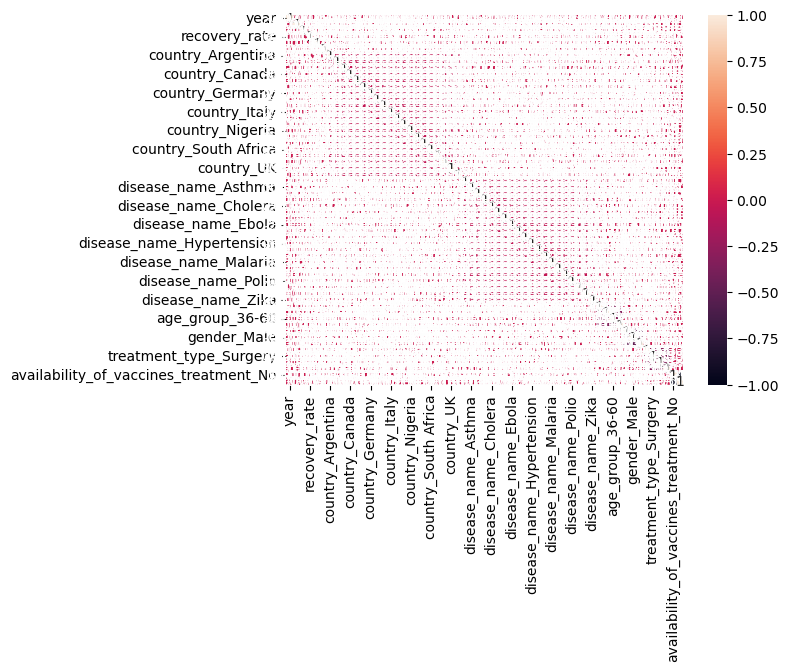

In [43]:
import seaborn as sns
sns.heatmap(health_df_cor.corr(), annot=True)

In [45]:
health_selection_df = pd.get_dummies(health_selection_df)

In [46]:
correlation_matrix = health_selection_df.corr()
print(correlation_matrix)

                                            year  prevalence_rate  \
year                                    1.000000        -0.000747   
prevalence_rate                        -0.000747         1.000000   
healthcare_access                      -0.001346        -0.000265   
recovery_rate                          -0.000393        -0.000442   
improvement_in_5_years                 -0.001093         0.000122   
urbanization_rate                       0.000463         0.002363   
country_Argentina                      -0.000751        -0.000352   
country_Australia                      -0.000060        -0.001758   
country_Brazil                          0.000122        -0.000137   
country_Canada                         -0.001065        -0.000136   
country_China                           0.000877        -0.001640   
country_France                         -0.000757        -0.000655   
country_Germany                        -0.000254         0.000968   
country_India                     

In [47]:
target_correlation = correlation_matrix['recovery_rate'].abs().sort_values(ascending=False)
print(target_correlation)

recovery_rate                             1.000000
gender_Female                             0.002740
country_Saudi Arabia                      0.001888
disease_name_Polio                        0.001841
gender_Male                               0.001821
healthcare_access                         0.001770
country_Indonesia                         0.001743
disease_name_Hepatitis                    0.001537
disease_name_Hypertension                 0.001332
availability_of_vaccines_treatment_No     0.001220
availability_of_vaccines_treatment_Yes    0.001220
country_South Korea                       0.001159
country_South Africa                      0.001114
country_Japan                             0.001112
treatment_type_Vaccination                0.001104
country_Brazil                            0.001032
urbanization_rate                         0.000993
country_Germany                           0.000945
disease_name_Cholera                      0.000924
gender_Other                   